##**TASK1**

**DATA ANALYSIS REPORT**

The dataset contains 120 images of disease infected rice leaves and the images are grouped into 3 classes based on the type of disease. There are 40 images in each class.

Classes

    * Leaf smut
    * Brown spot
    * Bacterial leaf blight

The rice leaves related diseases often pose threats to the sustainable production of rice affecting many farmers around the world. Early diagnosis and appropriate remedy of the rice leaf infection is crucial in facilitating healthy growth of the rice plants to ensure adequate supply and food security to the rapidly increasing population. Therefore, machine-driven disease diagnosis systems could mitigate the limitations of the conventional methods for leaf disease diagnosis techniques that is often time-consuming, inaccurate, and expensive.

WE will be using CNN-Image processing to understand the images and predict the disease of the leaves.

<u>As part of the process</u>
* we have split all the images( irrespective of the classification) into train and test data
* Scaling is performed to ensure that pixel values of images fall within a specific range, making it easier for the neural network to learn and converge efficiently.
* Perform Model creation and further split the train data to train and validation data.
* We train the model with validation data and expect a accuracy of 65%



## **TASK2**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [3]:
ls "/content/drive/MyDrive/RiceLeaf/Dataset"

'Bacterial leaf blight'/  'Brown spot'/  'Leaf smut'/


# Splitting the data into Train and Test datasets

In [4]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/RiceLeaf/Dataset',
    labels='inferred',
    label_mode='int',
    batch_size=64,

    image_size=(180,180),subset='training',validation_split=0.2,
    seed=11
)
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/RiceLeaf/Dataset',
    labels='inferred',
    label_mode='int',
    batch_size=64,

    image_size=(180,180),subset='validation',validation_split=0.2,
    seed=11
)

Found 119 files belonging to 3 classes.
Using 96 files for training.
Found 119 files belonging to 3 classes.
Using 23 files for validation.


# checking the shapes of train data

In [5]:
for image, labels in train_ds.take(1):
    print(image.shape)
    print(labels.shape)

(64, 180, 180, 3)
(64,)


# checking the shapes of test data

In [6]:
for image, labels in test_ds.take(1):
    print(image.shape)
    print(labels.shape)

(23, 180, 180, 3)
(23,)


# plotting the images from the data

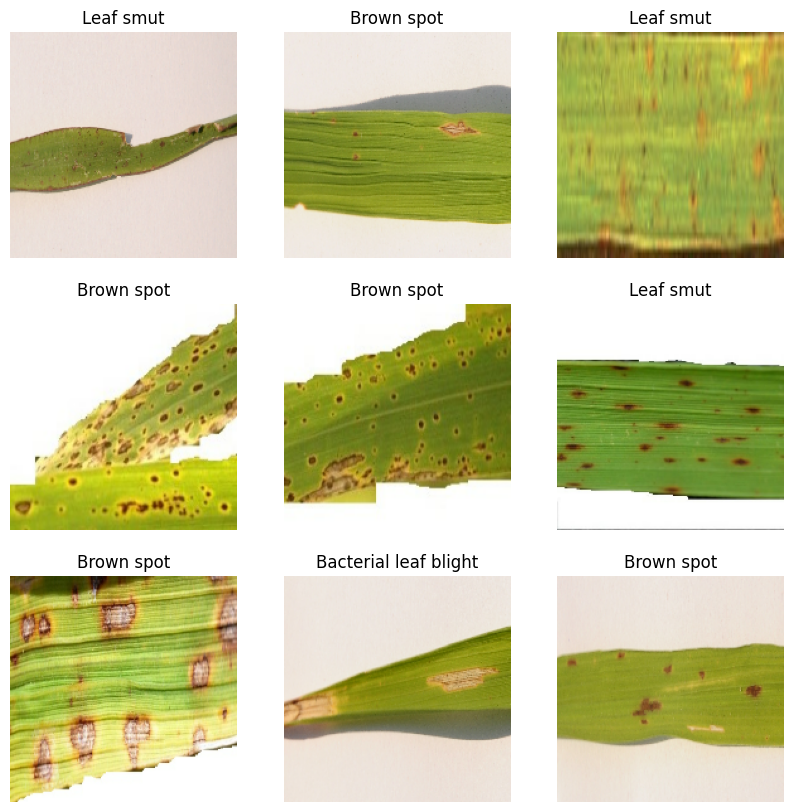

In [7]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Creating x and y label for Train dataset

In [8]:
# For train dataset
for image,labels in train_ds.take(1):
    x_train=image
    y_train=labels

# Creating x and y label for Test dataset

In [9]:
# For train dataset
for image,labels in test_ds.take(1):
    x_test=image
    y_test=labels

# Accessing the label names

In [10]:
train_ds.class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

# Scaling the data

In [11]:
x_train=x_train/255
x_test=x_test/255


# Model Creation

In [12]:
# create CNN model

model = Sequential()

model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(180,180,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))



model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))


model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dense(32,activation='relu'))

model.add(Dense(16,activation='relu'))

model.add(Dense(3,activation='softmax'))

In [13]:
model.summary()  # Model Summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 64)        0

In [14]:
# Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Training the model using Train dataset

In [15]:
# fitting the data
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 8s 975ms/step - loss: 1.1157 - accuracy: 0.3529 - val_loss: 1.1530 - val_accuracy: 0.3846
Epoch 2/100
2/2 [==============================] - 0s 59ms/step - loss: 1.0988 - accuracy: 0.3922 - val_loss: 1.1479 - val_accuracy: 0.3846
Epoch 3/100
2/2 [==============================] - 0s 47ms/step - loss: 1.1011 - accuracy: 0.3922 - val_loss: 1.1248 - val_accuracy: 0.3846
Epoch 4/100
2/2 [==============================] - 0s 47ms/step - loss: 1.0891 - accuracy: 0.3922 - val_loss: 1.1230 - val_accuracy: 0.4615
Epoch 5/100
2/2 [==============================] - 0s 50ms/step - loss: 1.0827 - accuracy: 0.5686 - val_loss: 1.1242 - val_accuracy: 0.4615
Epoch 6/100
2/2 [==============================] - 0s 49ms/step - loss: 1.0802 - accuracy: 0.4510 - val_loss: 1.1255 - val_accuracy: 0.4615
Epoch 7/100
2/2 [==============================] - 0s 48ms/step - loss: 1.0760 - accuracy: 0.4706 - val_loss: 1.1307 - val_accuracy: 0.3077
Epoch 8/100
2/2 [==

In [16]:
# Model evaluation
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 333ms/step - loss: 1.7744 - accuracy: 0.6522


[1.7744216918945312, 0.6521739363670349]

# Plottong graphs to compare the model accuracies

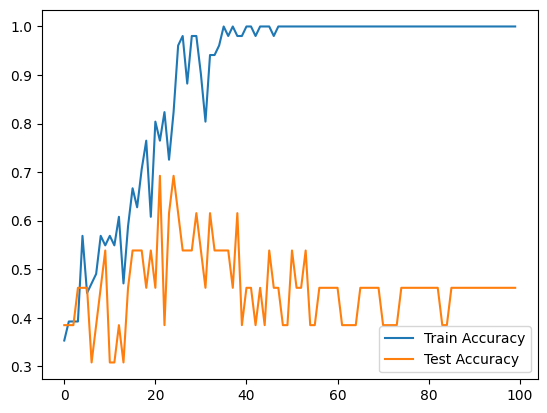

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(100), history.history['accuracy'],label='Train Accuracy')
plt.plot(range(100), history.history['val_accuracy'],label='Test Accuracy')
plt.legend()
plt.show()


##**TASK3**

**Data augmentation** is a set of techniques that enhance the size and quality of machine learning training datasets so that better deep learning models can be trained with them. Data Augmentation artificially inflates datasets using label-preserving data transformations.
Image data augmentation is the process of generating new transformed versions of images from the given image dataset to increase its diversity. To a computer, images are just a 2-dimensional array of numbers. These numbers represent pixel values, which you can tweak in many ways to generate new, augmented images.

# Data Augmentation

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,

)

# Data generator for training set
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)

# No data augmentation for the test set
test_datagen = ImageDataGenerator()

# Data generator for test set
test_generator = test_datagen.flow(x_test, y_test, batch_size=32)

# Now you can use train_generator and test_generator in your model.fit() and model.evaluate() calls


# Plotting the images from the Augemented data

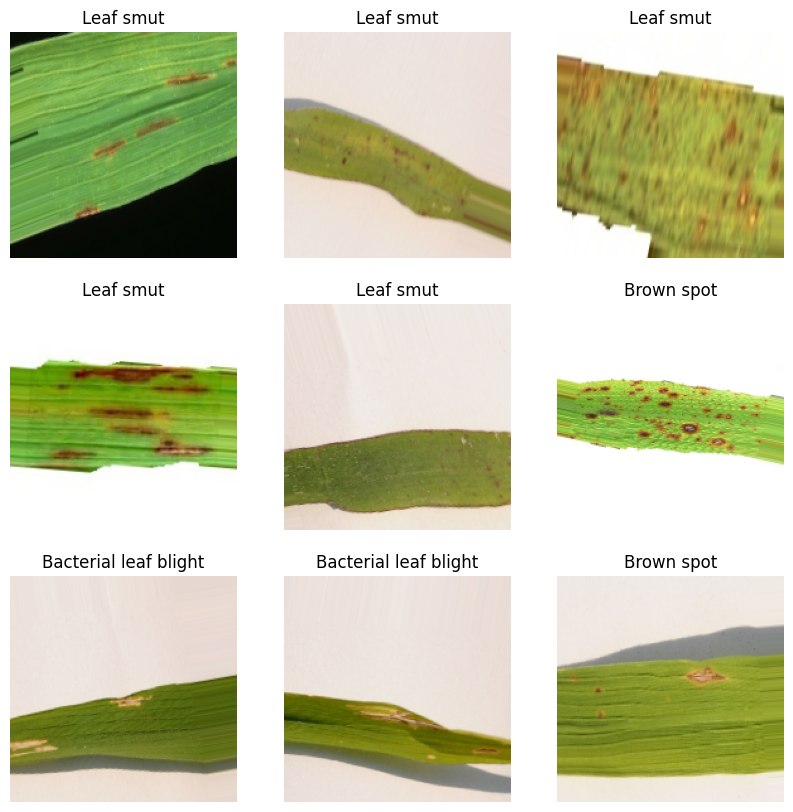

In [19]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
images, labels = next(train_generator)
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label_index = labels[i]
    plt.title(class_names[label_index])

    plt.axis("off")

# Model Creation

In [20]:
# create CNN model

model1 = Sequential()

model1.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(180,180,3)))
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.2))

model1.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
model.add(Dropout(0.2))

model1.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
model.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model1.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model1.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))

model1.add(Dense(3,activation='softmax'))

In [21]:
# Compiling the model
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
# fitting the data
history=model1.fit(train_generator,epochs=100,validation_data=test_generator)

Epoch 1/100
2/2 [==============================] - 3s 266ms/step - loss: 1.1074 - accuracy: 0.2812 - val_loss: 1.1085 - val_accuracy: 0.3043
Epoch 2/100
2/2 [==============================] - 1s 265ms/step - loss: 1.0944 - accuracy: 0.3281 - val_loss: 1.1082 - val_accuracy: 0.3478
Epoch 3/100
2/2 [==============================] - 1s 260ms/step - loss: 1.0900 - accuracy: 0.4062 - val_loss: 1.1086 - val_accuracy: 0.3478
Epoch 4/100
2/2 [==============================] - 1s 274ms/step - loss: 1.0785 - accuracy: 0.4688 - val_loss: 1.1046 - val_accuracy: 0.2609
Epoch 5/100
2/2 [==============================] - 1s 277ms/step - loss: 1.0609 - accuracy: 0.4062 - val_loss: 1.1135 - val_accuracy: 0.2609
Epoch 6/100
2/2 [==============================] - 1s 266ms/step - loss: 1.0242 - accuracy: 0.5625 - val_loss: 1.1135 - val_accuracy: 0.3913
Epoch 7/100
2/2 [==============================] - 1s 286ms/step - loss: 1.0346 - accuracy: 0.5156 - val_loss: 1.1448 - val_accuracy: 0.3478
Epoch 8/100
2

# Model evaluation

In [23]:
test_loss, test_accuracy = model1.evaluate(x_test,y_test)

1/1 [==============================] - 0s 33ms/step - loss: 0.5040 - accuracy: 0.7391


# Plottong graphs to compare the model accuracies

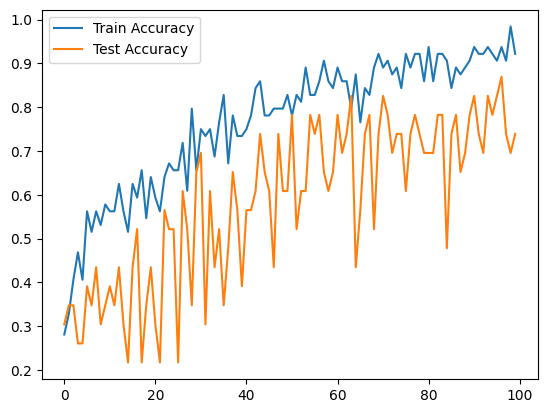

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(100), history.history['accuracy'],label='Train Accuracy')
plt.plot(range(100), history.history['val_accuracy'],label='Test Accuracy')
plt.legend()
plt.show()


## **Using KERASTUNER**

In [25]:
# Insatlling keras tuner module...
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.7 MB/s eta 0:00:00


# Hyper parameter tuning

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch


# Define the model-building function with hyperparameters



def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Conv2D(
        filters=hp.Int('conv1_units', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(180,180,3)
    ))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(
        units=hp.Int('dense1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ))
    model.add(layers.Dense(3, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


# Create a tuner instance (RandomSearch in this example)
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of different hyperparameter combinations to try
    executions_per_trial=3,  # Number of models to train for each trial
    directory='keras_tuner_dir',  # Directory to save tuning results
    project_name='cnn_tuning'  # Name of the tuning project
)

# Search for the best hyperparameters
tuner.search(x_train, y_train, epochs=5, validation_split=0.2)

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_hyperparameters)

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc}")


Trial 5 Complete [00h 00m 19s]
val_accuracy: 0.5384615659713745

Best val_accuracy So Far: 0.5384615659713745
Total elapsed time: 00h 04m 47s
Best Hyperparameters:
1/1 [==============================] - 0s 367ms/step - loss: 1.4299 - accuracy: 0.3043

Test Accuracy: 0.30434781312942505


# Getting the best model..

In [28]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 176, 112)     8512      
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 88, 112)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 867328)            0         
                                                                 
 dense (Dense)               (None, 64)                55509056  
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 55517763 (211.78 MB)
Trainable params: 55517763 (211.78 MB)
Non-trainable params: 0 (0.00 Byte)
____________

# Fitting the augmentated data to the best model..

In [29]:
history=best_model.fit(train_generator,epochs=100,validation_data=test_generator)

Epoch 1/100
2/2 [==============================] - 2s 283ms/step - loss: 1.1389 - accuracy: 0.3594 - val_loss: 1.7236 - val_accuracy: 0.3913
Epoch 2/100
2/2 [==============================] - 1s 317ms/step - loss: 1.7091 - accuracy: 0.3906 - val_loss: 1.1083 - val_accuracy: 0.5217
Epoch 3/100
2/2 [==============================] - 1s 295ms/step - loss: 1.0670 - accuracy: 0.4062 - val_loss: 1.3658 - val_accuracy: 0.3043
Epoch 4/100
2/2 [==============================] - 1s 497ms/step - loss: 1.1196 - accuracy: 0.4844 - val_loss: 0.9639 - val_accuracy: 0.5217
Epoch 5/100
2/2 [==============================] - 1s 492ms/step - loss: 0.9958 - accuracy: 0.5469 - val_loss: 0.9265 - val_accuracy: 0.6522
Epoch 6/100
2/2 [==============================] - 1s 493ms/step - loss: 0.9749 - accuracy: 0.5938 - val_loss: 0.9026 - val_accuracy: 0.5217
Epoch 7/100
2/2 [==============================] - 1s 293ms/step - loss: 0.9988 - accuracy: 0.5000 - val_loss: 0.8922 - val_accuracy: 0.5652
Epoch 8/100
2

In [30]:
# Model evaluation
test_loss, test_accuracy = best_model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 41ms/step - loss: 0.4363 - accuracy: 0.8261


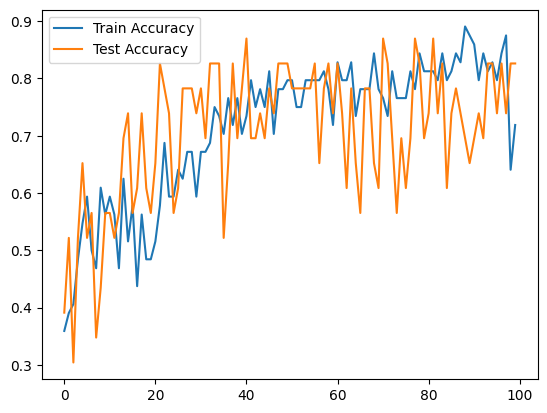

In [31]:
# Plottong graphs to compare the model accuracies
import matplotlib.pyplot as plt
plt.plot(range(100), history.history['accuracy'],label='Train Accuracy')
plt.plot(range(100), history.history['val_accuracy'],label='Test Accuracy')
plt.legend()
plt.show()


## **Model Comparison Report**

 Comparison: Using the traditional image processing model, we observed 65% as the accuracy
> To improve on the accuracy, we tried using kerastuner, which would fetch us the best parameter for training the model ,and we could see the improvement of the accuracy to 82%




## **Report on Challenges faced**

* Reading the image files- as the images are categorized into different folders

* model building- We had to tweak the parameter in model building, compile and while training to get the best accuracy

* Keras Tuner- as this was new concept , we spent time in understanding and implementing the same. It can be compared with GridSearchCV and RandomSearchCV.



